# Multiple Linear Regression

## Bike Sharing System Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps Followed:
### Step 1: Reading and Understanding the data
### Step 2: Data visualization and outliers detection (if any)
### Step 3: Data preparation
### Step 4: Splitting the data into training and test sets
### Step 5: Rescaling the variables
### Step 6: Residual Analysis of the train data
### Step 7: Making predictions using the test dataset with out model
### Step 8: Model Evaluation and  Equation
### Conclusion

In [135]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [137]:
# reading dataset
bike=pd.read_csv("day.csv")

In [138]:
# checking head of dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Overview of the dataset

In [139]:
# taking the overview of the dataset
bike.shape

(730, 16)

In [140]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [141]:
# Looking unique values in the features
bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [142]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Since there is not much difference between mean and median , we can say that data does not contain outliers

In [143]:
#Checking missing values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 2: Visualising the data

###  Making box plots of the numerical variables to detect outliers

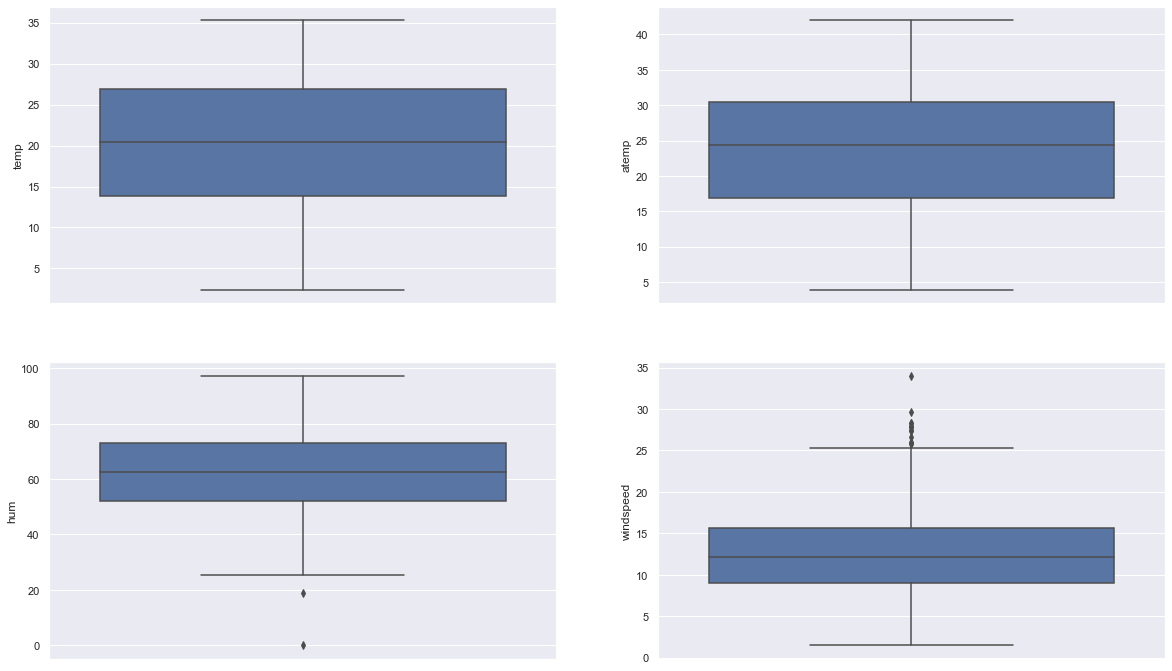

In [144]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'temp', data = bike)
plt.subplot(2,2,2)
sns.boxplot(y = 'atemp', data = bike)
plt.subplot(2,2,3)
sns.boxplot(y = 'hum', data = bike)
plt.subplot(2,2,4)
sns.boxplot(y = 'windspeed', data = bike)

plt.show()

#### From above box plots it can be concluded that there are no outliers in  the numerical variables

### Let's first visualise numeric variables of our dataset and see the relationship with _cnt_:

###  (a) Univariate Analysis

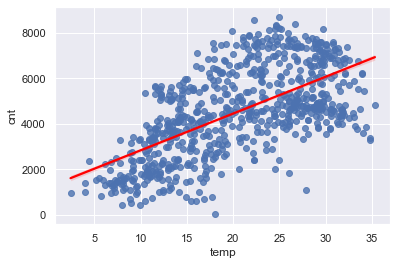

In [145]:
# temp vs cnt plot
sns.set_theme(style="darkgrid")
sns.regplot(x='temp', y='cnt' , data=bike,ci=68, fit_reg=True, line_kws={"color": "red"})
plt.show()

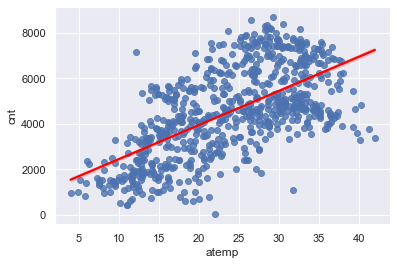

In [146]:
# atemp vs cnt plot
sns.regplot(x='atemp', y='cnt' , data=bike, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.show()

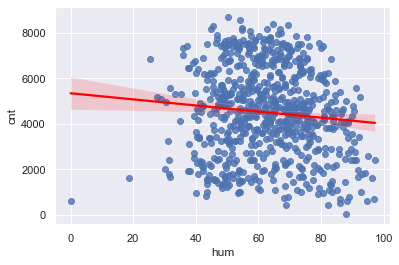

In [147]:
# hum vs cnt plot
sns.regplot(x='hum', y='cnt' , data=bike, fit_reg=True, line_kws={"color": "red"})
plt.show()

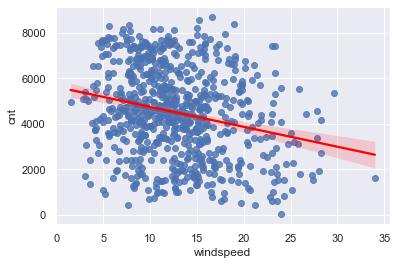

In [148]:
# windspeed vs cnt plot
sns.regplot(x='windspeed', y='cnt' , data=bike, fit_reg=True, line_kws={"color": "red"})
plt.show()

### (b) Bivariate analysis

###  Making pair plot of all numeric variables:  cnt, temp, atemp, hum, windspeed


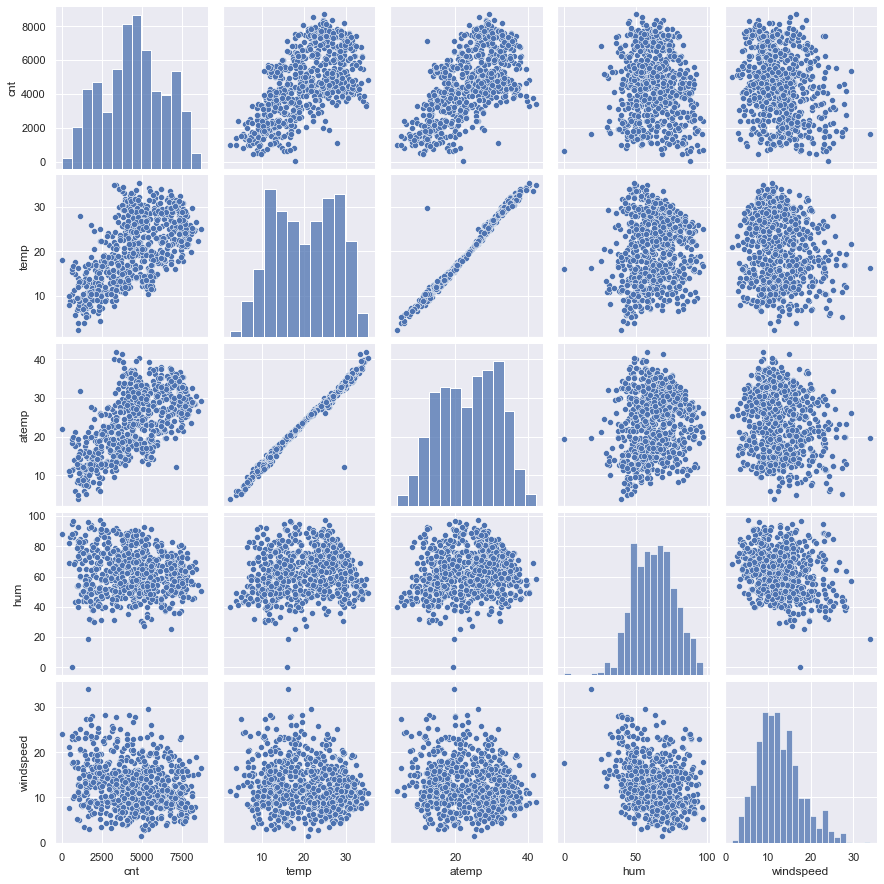

In [149]:
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### (c) Visualising categorical variables

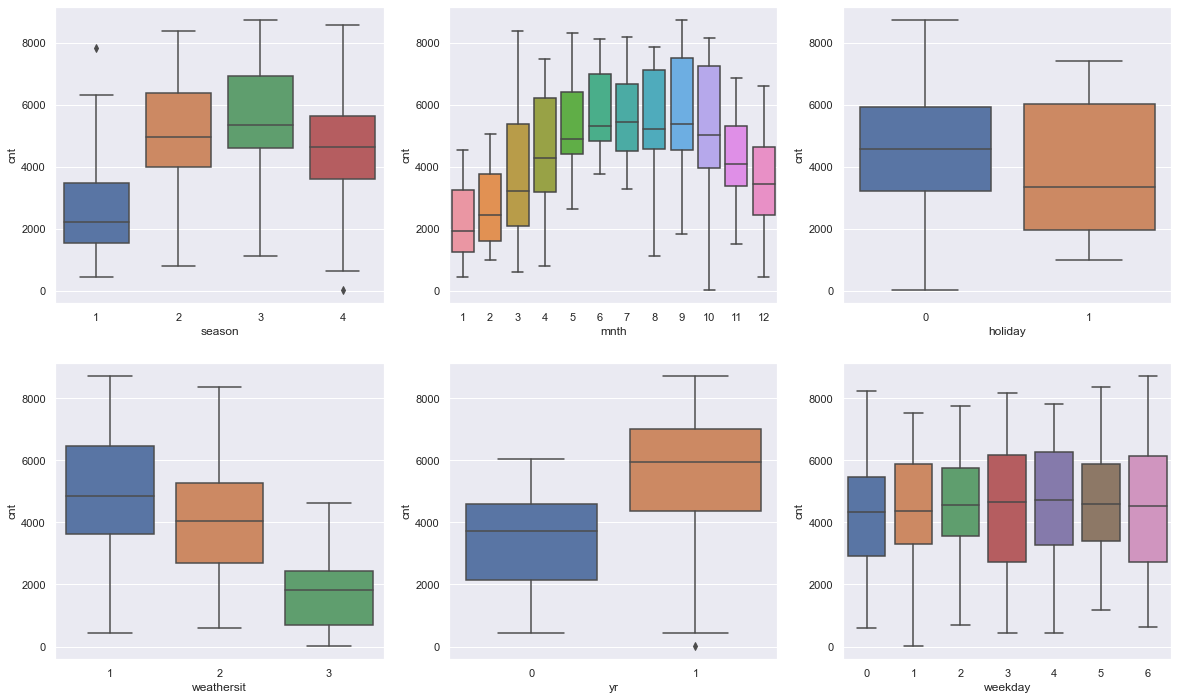

In [150]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

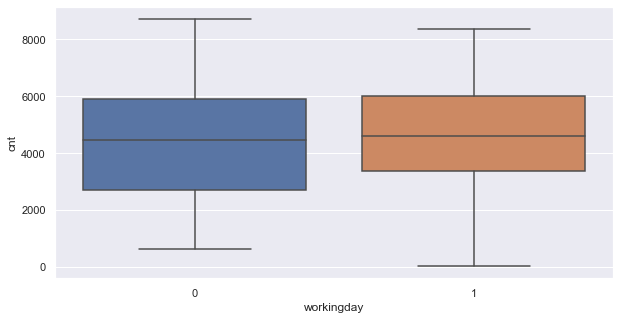

In [151]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### inferences from above graphs
- Season:  Spring season (category 1) has the lowest number of counts of bike sharing, while fall season (category 3) has highest number of bike sharing
- mnth:  January, February, november and december has lower number of bike sharing, while summer months have higher number of bike sharing 
- holiday:  holidays (category 1) has higher number of bike sharing than other days.
- weathersit: clear weather(category 1) has highest number of bike sharing while there is zero bike sharing in bad weather (category 4:  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- yr:  higher number of bike sharing observed in year 2019 (category 1), than in 2018 (category 2), it shows the business for bike sharing is increasing at a fast pace.
- weekday:  there is not much variation in the bike sharing count with weekdays
- workingday:  there is not much variation in the bike sharing with working days or weekends or holidays.


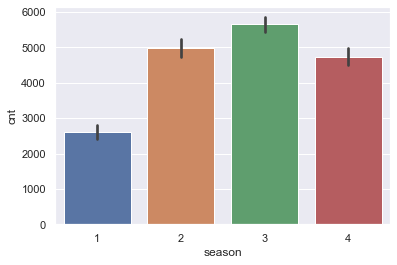

In [152]:
# Relation between season and count of BoomBikes

sns.barplot(x='season',y='cnt',data=bike)
plt.show()

cnt is highest for fall followed by summer

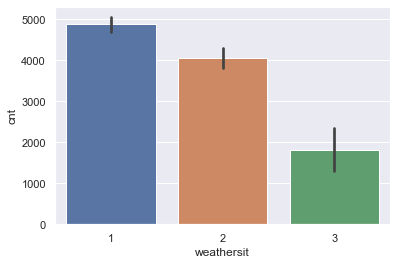

In [153]:
#Relation between weather and count of BoomBikes
sns.barplot(x='weathersit',y='cnt',data=bike)
plt.show()

cnt is highest for Clear weather which seems logical

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

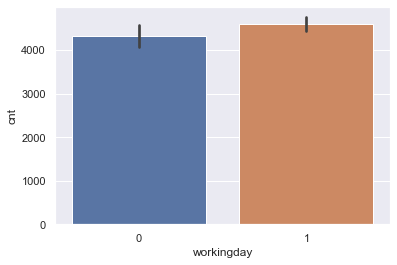

In [154]:
sns.barplot(x='workingday',y='cnt',data=bike)

The difference in cnt with workingday is not that much prominent

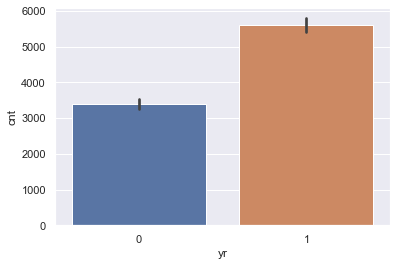

In [155]:
#Relation between Year and count of BoomBikes
sns.barplot(x='yr',y='cnt',data=bike)
plt.show()

Clearly, cnt has significantly increased in 2019

### Correlation Matrix

### Let's plot Heatmap to see correlation between variables

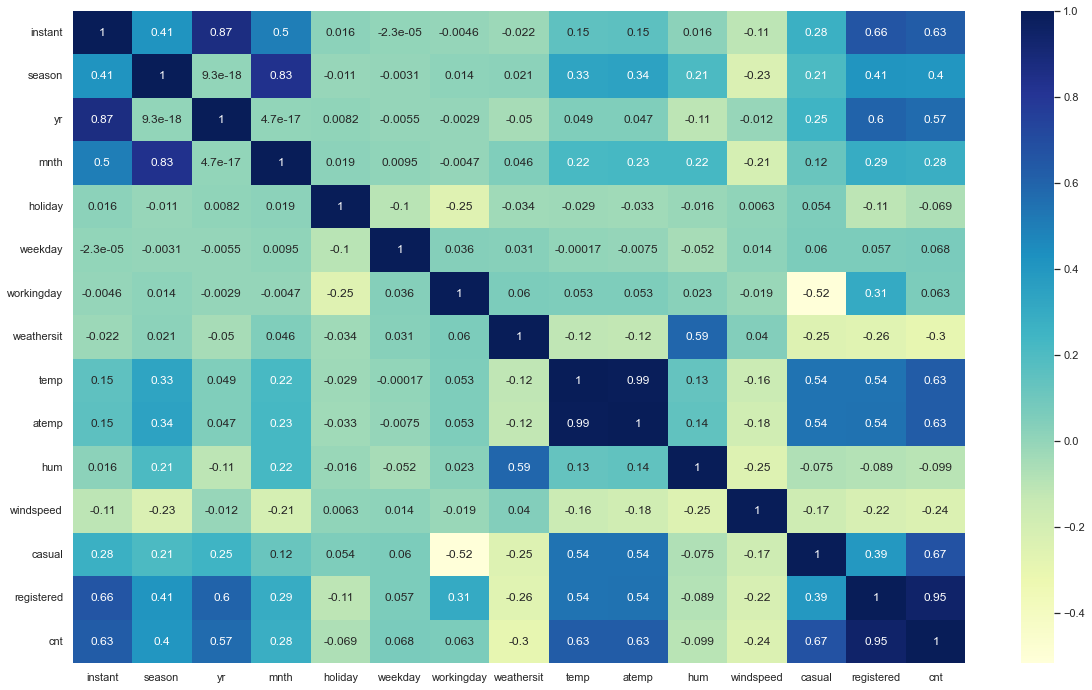

In [156]:
plt.figure(figsize=(20,12))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")
plt.show()

### We can see that correlation between temp and atemp is very high i.e. 0.99. We can drop this column from our dataset

## Step 3: Data preparation

#### Dropping the columns irrelevant for the analysis
- "instant" column does not contain any information hence can be dropped
- "dteday" will not be helpful in analysis as we already have month and year columns
- "casual" and "registered" column can be dropped as sum of these columns is already there as "cnt" column
- "atemp" column can be dropped as it is having very high correlation (0.99) with temp variable

In [157]:
bike.drop(['instant','dteday','casual','registered', 'atemp'],axis = 1,inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### mapping the numerical codes of the categorical variables to their labels

In [158]:
# mapping mnth
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [159]:
# maping seasons
bike.season = bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [160]:
# mapping weathersit
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [161]:
# mapping weekday
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [162]:
# Checking the head of thae dataframe now
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


## Creating Dummy variables for the categorical variables

In [163]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike[['season','mnth','weekday','weathersit']]

In [164]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [165]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike],axis = 1)

In [166]:
# Now let's see the head of our dataframe.
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [167]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [168]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [169]:
bike_data.shape

(730, 29)

## Step 4: Splitting the data into training and test sets

In [170]:
train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Rescaling the variables

In [171]:
scaler = MinMaxScaler()

In [172]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [173]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [174]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [175]:
y_train = train.pop('cnt')
X_train = train

In [176]:
X_train.shape

(510, 28)

### Building Model with all the variables

In [177]:
# build a model with all variables
X_train_sm= sm.add_constant(X_train)

# create model
lm=sm.OLS(y_train, X_train_sm)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.74e-182
Time:                        18:45:34   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2451      0.035      6.955      0.000       0.176       0.314
season_Spring                   -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_Summer                    0.0387      0.026      1.478      0.140      -0.013       0.090
season_Winter                    0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                         0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                        -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                        -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                        -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                        -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                        -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                         0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                         0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                        -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                         0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Monday                  -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Saturday                 0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sunday                   0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thrusday                -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tuesday                 -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wednesday               -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_Light Snow & Rain    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist & Cloudy        -0.0611      0.010     -5.854      0.000      -0.082      -0.041
yr                               0.2321      0.008     28.820      0.000       0.216       0.248
holiday                          0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                       0.0969      0.012      7.905      0.000       0.073       0.121
temp                             0.4506      0.046      9.734      0.000       0.360       0.542
hum                             -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                       -0.1865      0.026     -7.257      0.000    

### Checking VIF

In [178]:
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif
      

,features,VIF
24,workingday,85.58
15,weekday_Saturday,19.72
16,weekday_Sunday,18.35
0,season_Spring,10.79
2,season_Winter,9.50
1,season_Summer,8.29
25,temp,7.12
11,mnth_Nov,6.80
12,mnth_Oct,6.59
3,mnth_Aug,6.43


In [179]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=14)             # running RFE
#rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [180]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 14),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Starting with all the columns selected by RFE


### Model 1

In [181]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [182]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [183]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [184]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.13e-191
Time:                        18:45:35   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2394      0.036      6.696      0.000       0.169       0.310
season_Spring                   -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_Summer                    0.0526      0.015      3.553      0.000       0.024       0.082
season_Winter                    0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul                        -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep                         0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Saturday                 0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist & Cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
yr                               0.2297      0.008     28.660      0.000       0.214       0.245
holiday                         -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday                       0.0432      0.012      3.744      0.000       0.021       0.066
temp                             0.5278      0.033     15.897      0.000       0.463       0.593
hum                             -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                       -0.1806      0.025     -7.110      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
vif=pd.DataFrame()
vif["features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif
    

,features,VIF
0,const,82.34
1,season_Spring,5.02
12,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
13,hum,1.91
11,workingday,1.88
6,weekday_Saturday,1.78
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


#### dropping the "holiday" column since it has highest p value

In [186]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

### Model 2

In [187]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a fitted model
lm = sm.OLS(y_train,X_train_rfe)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.51e-192
Time:                        18:45:36   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2298      0.036      6.451      0.000       0.160       0.300
season_Spring                   -0.0565      0.021     -2.736      0.006      -0.097      -0.016
season_Summer                    0.0530      0.015      3.562      0.000       0.024       0.082
season_Winter                    0.0993      0.017      5.813      0.000       0.066       0.133
mnth_Jul                        -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_Sep                         0.0797      0.017      4.819      0.000       0.047       0.112
weekday_Saturday                 0.0622      0.014      4.438      0.000       0.035       0.090
weathersit_Light Snow & Rain    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
weathersit_Mist & Cloudy        -0.0576      0.010     -5.512      0.000      -0.078      -0.037
yr                               0.2300      0.008     28.580      0.000       0.214       0.246
workingday                       0.0521      0.011      4.790      0.000       0.031       0.073
temp                             0.5279      0.033     15.838      0.000       0.462       0.593
hum                             -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                       -0.1812      0.025     -7.106      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif=pd.DataFrame()
vif["features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,81.13
1,season_Spring,5.02
11,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
12,hum,1.91
10,workingday,1.65
6,weekday_Saturday,1.64
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


#### since "season_Spring" has highest p value among variables and VIF value above 5. it can be dropped.

In [189]:
X_train_rfe = X_train_rfe.drop(["season_Spring"], axis = 1)

### Model 3

In [190]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a fitted model
lm = sm.OLS(y_train,X_train_rfe)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.26e-191
Time:                        18:45:36   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1705      0.028      5.991      0.000       0.115       0.226
season_Summer                    0.0815      0.011      7.650      0.000       0.061       0.102
season_Winter                    0.1365      0.010     13.067      0.000       0.116       0.157
mnth_Jul                        -0.0442      0.018     -2.467      0.014      -0.079      -0.009
mnth_Sep                         0.0926      0.016      5.804      0.000       0.061       0.124
weekday_Saturday                 0.0627      0.014      4.446      0.000       0.035       0.090
weathersit_Light Snow & Rain    -0.2404      0.026     -9.152      0.000      -0.292      -0.189
weathersit_Mist & Cloudy        -0.0551      0.010     -5.261      0.000      -0.076      -0.035
yr                               0.2286      0.008     28.280      0.000       0.213       0.244
workingday                       0.0527      0.011      4.816      0.000       0.031       0.074
temp                             0.5960      0.022     26.678      0.000       0.552       0.640
hum                             -0.1693      0.038     -4.514      0.000      -0.243      -0.096
windspeed                       -0.1885      0.026     -7.386      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       65.490   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.563
Skew:                          -0.687   Prob(JB):                     2.02e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
vif=pd.DataFrame()
vif["features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,51.12
11,hum,1.89
9,workingday,1.65
5,weekday_Saturday,1.64
10,temp,1.60
7,weathersit_Mist & Cloudy,1.56
3,mnth_Jul,1.43
1,season_Summer,1.33
2,season_Winter,1.29
6,weathersit_Light Snow & Rain,1.24


#### dropping the "mnth_Jul" column since it has the highest p value

In [192]:
X_train_rfe = X_train_rfe.drop(["mnth_Jul"], axis = 1)

### Model 4

In [193]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a fitted model
lm = sm.OLS(y_train,X_train_rfe)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.89e-191
Time:                        18:45:37   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1698      0.029      5.937      0.000       0.114       0.226
season_Summer                    0.0899      0.010      8.859      0.000       0.070       0.110
season_Winter                    0.1407      0.010     13.575      0.000       0.120       0.161
mnth_Sep                         0.1025      0.016      6.610      0.000       0.072       0.133
weekday_Saturday                 0.0630      0.014      4.450      0.000       0.035       0.091
weathersit_Light Snow & Rain    -0.2439      0.026     -9.250      0.000      -0.296      -0.192
weathersit_Mist & Cloudy        -0.0553      0.011     -5.255      0.000      -0.076      -0.035
yr                               0.2294      0.008     28.272      0.000       0.213       0.245
workingday                       0.0536      0.011      4.875      0.000       0.032       0.075
temp                             0.5709      0.020     28.559      0.000       0.532       0.610
hum                             -0.1613      0.038     -4.295      0.000      -0.235      -0.087
windspeed                       -0.1861      0.026     -7.259      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
vif=pd.DataFrame()
vif["features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,51.12
10,hum,1.87
8,workingday,1.65
4,weekday_Saturday,1.64
6,weathersit_Mist & Cloudy,1.56
9,temp,1.27
2,season_Winter,1.25
5,weathersit_Light Snow & Rain,1.24
1,season_Summer,1.19
11,windspeed,1.18


### now since p values of all the variables are zero. we can treat this model as final model

## Step 6: Residual Analysis of the train data

now we have to check distribution of the error terms, it should be normally distributed, which is an important assumptions in the linear regression.

In [195]:
# predicted values of the dependent variable by the model
y_train_pred = lm_model.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

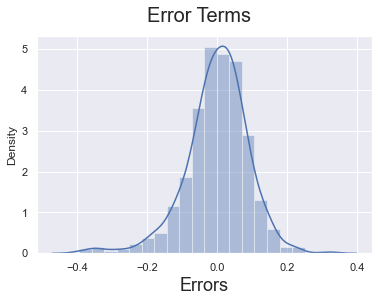

In [196]:
# now checking the distribution of the error terms by ploting the histogram
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### The error terms are almost normally distributed
#### it means there is no pattern in the error terms, and our model is almost the best model we can have with the data available

## Step 7: Making predictions using the test dataset with out model

### Applying scaling on the Test set

In [197]:
num_vars = ['cnt','hum','windspeed','temp']


test[num_vars] = scaler.transform(test[num_vars])

In [198]:
test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [199]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [200]:
y_test = test.pop('cnt')
X_test = test

In [201]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [202]:
# predicting using values used by the final model
test_col = X_train_rfe.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Sep                      219 non-null    uint8  
 4   weekday_Saturday              219 non-null    uint8  
 5   weathersit_Light Snow & Rain  219 non-null    uint8  
 6   weathersit_Mist & Cloudy      219 non-null    uint8  
 7   yr                            219 non-null    int64  
 8   workingday                    219 non-null    int64  
 9   temp                          219 non-null    float64
 10  hum                           219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [203]:
# Making predictions using our final model

y_pred = lm_model.predict(X_test)

In [204]:
# calculating the r-squared value 
r2_score(y_test, y_pred)

0.805885826309035

## Step 8: Model Evaluation and  Equation

plotting the graph between actual and predected value of dependent variable

Text(0, 0.5, 'y_pred')

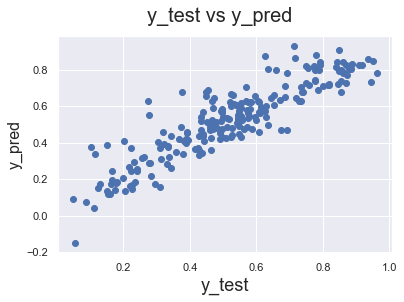

In [205]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [206]:
param = pd.DataFrame(lm_model.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
9,temp,0.570880
7,yr,0.229437
0,const,0.169821
2,season_Winter,0.140652
3,mnth_Sep,0.102541
1,season_Summer,0.089914
4,weekday_Saturday,0.063047
8,workingday,0.053557
6,weathersit_Mist & Cloudy,-0.055314


that the equation of our best fitted line is:

cnt = 0.169821 + 0.570880 X temp + 0.229437 X yr + 0.140652 X season_Winter + 0.102541 X mnth_Sep + 0.089914 X season_Summer + 0.063047 X weekday_Saturday + 0.053557 X workingday - 0.055314 X weathersit_Mist & Cloudy - 0.161282 X hum - 0.186078 X windspeed - 0.243890 X weathersit_Light Snow & Rain

All the positive coefficients of variables : 
- temp
- yr
- season_Winter
- mnth_Sep
- season_Summer
- weekday_Saturday
- workingday <br>
<br>
indicate that an increase in these values will lead to an increase in the value of cnt (bike sharing).<br>
<br>
All the negative coefficients of variables:
- weathersit_Light Snow & Rain
- windspeed
- hum
- weathersit_Mist & Cloudy <br>
<br>
indicate that an increase in these values will lead to an decrease in the value of cnt.


## Conclusion:
###  - Temp is the most significant variable with the largest positive coefficient, with increase in temperature bike rentals increases.
###  - The count of bike sharing is increasing with year.
###  - Bike rentals is more for the winter season
###  - Bike rentals is more for the month of september
###  - The rentals reduce during bad weather i.e. weathersit_Light Snow & Rain
###  -  The rentals reduce during high wind speed
## This indicates that the bike rentals is majorly affected by temperature,season and bad weather.